In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("german_credit_data.csv")

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
df.isnull().sum()


,0
Unnamed: 0,0
Age,0
Sex,0
Job,0
Housing,0
Saving accounts,183
Checking account,394
Credit amount,0
Duration,0
Purpose,0


In [ ]:
df = df.dropna(subset=["Saving accounts", "Checking account"])


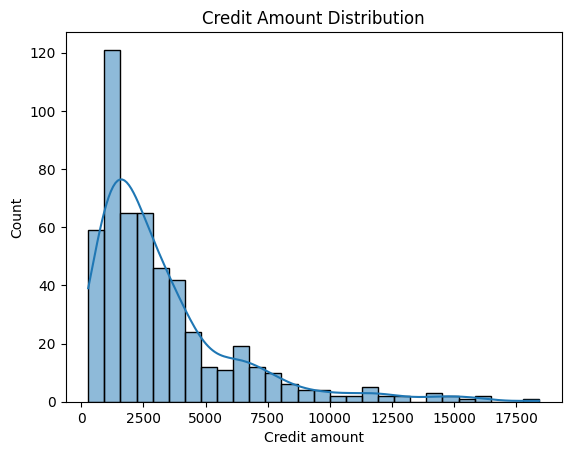

In [ ]:
plt.figure()
sns.histplot(df["Credit amount"], kde=True)
plt.title("Credit Amount Distribution")
plt.show()


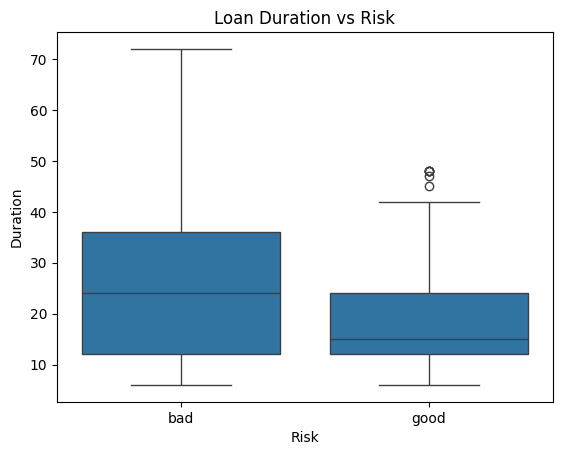

In [ ]:
plt.figure()
sns.boxplot(x="Risk", y="Duration", data=df)
plt.title("Loan Duration vs Risk")
plt.show()


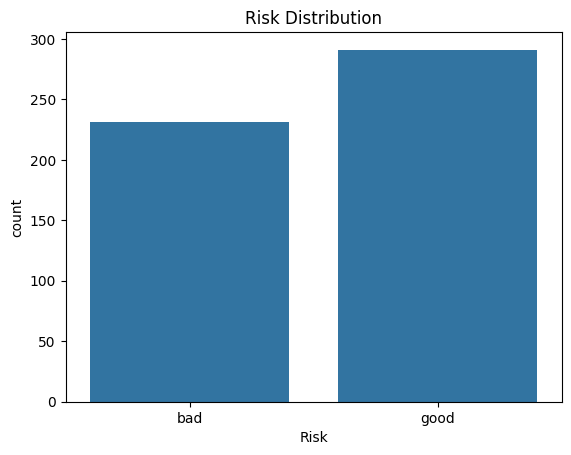

In [ ]:
plt.figure()
sns.countplot(x="Risk", data=df)
plt.title("Risk Distribution")
plt.show()


In [ ]:
features = [
    "Age", "Sex", "Job", "Housing",
    "Saving accounts", "Checking account",
    "Credit amount", "Duration"
]

X = df[features]
y = df["Risk"]


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_dict = {}
cat_cols = X.select_dtypes(include="object").columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoder_dict[col] = le

y = y.map({"good": 1, "bad": 0})


/tmp/ipython-input-1241740347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-1241740347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-1241740347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [ ]:
from sklearn.model_selection import GridSearchCV

def train_model(model, params):
    grid = GridSearchCV(
        model,
        params,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    preds = best_model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    return best_model, acc


In [ ]:
models = {
    "Decision Tree": (
        DecisionTreeClassifier(),
        {"max_depth": [3, 5, 10]}
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {"n_estimators": [100, 200]}
    ),
    "Extra Trees": (
        ExtraTreesClassifier(),
        {"n_estimators": [100, 200]}
    ),
    "XGBoost": (
        XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
        {"n_estimators": [100, 200]}
    )
}

results = {}

for name, (model, params) in models.items():
    best_model, acc = train_model(model, params)
    results[name] = (best_model, acc)
    print(f"{name} Accuracy: {acc:.2f}")


Decision Tree Accuracy: 0.64
Random Forest Accuracy: 0.65
Extra Trees Accuracy: 0.63
XGBoost Accuracy: 0.73


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:20:20] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
import joblib

best_model = results["Extra Trees"][0]

joblib.dump(best_model, "credit_risk_model.pkl")
joblib.dump(encoder_dict, "encoders.pkl")


['encoders.pkl']